In [2]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso, HuberRegressor, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, r2_score, roc_auc_score, recall_score, precision_score, average_precision_score


np.random.seed(25)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

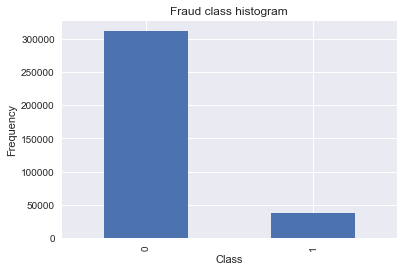

In [4]:
# Check whether dataset is balanced or not

count_classes = pd.value_counts(train['target'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
train.isnull().sum(axis=0)

transaction_id         0
num_var_1              0
num_var_2              0
num_var_3              0
num_var_4              0
num_var_5              0
num_var_6              0
num_var_7              0
cat_var_1          15782
cat_var_2              0
cat_var_3          43853
cat_var_4              0
cat_var_5              0
cat_var_6              0
cat_var_7              0
cat_var_8         109738
cat_var_9              0
cat_var_10             0
cat_var_11             0
cat_var_12             0
cat_var_13             0
cat_var_14             0
cat_var_15             0
cat_var_16             0
cat_var_17             0
cat_var_18             0
cat_var_19             0
cat_var_20             0
cat_var_21             0
cat_var_22             0
cat_var_23             0
cat_var_24             0
cat_var_25             0
cat_var_26             0
cat_var_27             0
cat_var_28             0
cat_var_29             0
cat_var_30             0
cat_var_31             0
cat_var_32             0


In [6]:
# Drop unnecessary features

train = train.drop(['cat_var_23', 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_31', 'cat_var_32', 'cat_var_33',
                    'cat_var_34', 'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_39', 'cat_var_40', 'cat_var_41', 'cat_var_42'], axis=1)
test = test.drop(['cat_var_23', 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_31', 'cat_var_32', 'cat_var_33',
                  'cat_var_34', 'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_39', 'cat_var_40', 'cat_var_41', 'cat_var_42'], axis=1)

In [7]:
train = train.fillna({'cat_var_1': str('df'), 'cat_var_3': str('qt'), 'cat_var_8': str('dn')})
test = test.fillna({'cat_var_1': str('gf'), 'cat_var_3': str('qt'), 'cat_var_6': str('zs'), 'cat_var_8': str('dn')})

In [8]:
# One-hot encoding
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
for i in range(1,23):
    train["cat_var_" + str(i)] = lb_make.fit_transform(train["cat_var_" + str(i)])


for i in range(1,23):
    test["cat_var_" + str(i)] = lb_make.fit_transform(test["cat_var_" + str(i)])

In [9]:
feature_names = [x for x in train.columns if x not in ['transaction_id','target']]
target = train['target']

In [10]:
import xgboost as xgb

In [11]:
# default parameters
params = {'objective':'binary:logistic',
          'max_delta_step': 1,
           'eval_metric':'auc',
          'max_depth': 3
         }

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(train[feature_names], target, train_size = 0.7, stratify = target, random_state = 2017)

In [13]:
dtrain = xgb.DMatrix(data=X_train[feature_names], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[feature_names], label=y_valid)
dtest = xgb.DMatrix(data=test[feature_names])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [14]:
model = xgb.train(params, dtrain, 1000, watchlist, maximize=True, verbose_eval=20, early_stopping_rounds=40)

[0]	train-auc:0.637738	eval-auc:0.636852
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 40 rounds.
[20]	train-auc:0.722777	eval-auc:0.718269
[40]	train-auc:0.727563	eval-auc:0.719441
[60]	train-auc:0.731403	eval-auc:0.719865
[80]	train-auc:0.735133	eval-auc:0.721274
[100]	train-auc:0.737226	eval-auc:0.721876
[120]	train-auc:0.741486	eval-auc:0.722016
[140]	train-auc:0.744566	eval-auc:0.722591
[160]	train-auc:0.747378	eval-auc:0.722892
[180]	train-auc:0.748514	eval-auc:0.723866
[200]	train-auc:0.750545	eval-auc:0.72439
[220]	train-auc:0.753361	eval-auc:0.724058
Stopping. Best iteration:
[197]	train-auc:0.750336	eval-auc:0.724591



In [15]:
pred = model.predict(dtest)

In [16]:
pred[:10]

array([ 0.05806381,  0.07861626,  0.08059821,  0.07636834,  0.09758954,
        0.11005983,  0.13982588,  0.09103127,  0.14241676,  0.0697377 ], dtype=float32)

In [18]:
## make submission
sub = pd.DataFrame()
sub['transaction_id'] = test['transaction_id']
sub['target'] = pred
sub.to_csv('result.csv', index=False)